In this homework, for all the 3 parts , we have the initial set up as follows:
We have an open tandem queue with 7 queues.We have customers arriving at an arrival rate of lambda to the first queue. For all the queues in the set up, service time remains constant.

We are expected to calculate statistics in case of normal distribution and the variance reduciton methods- antithetic variate method and control variate method.
In all the 3 parts, we are expected to generate 30 or more samples of data(X_is) either by modifying stat variables or by modifying seeds. Using the outputs of all the 30 samples, we calculate mean/theta, variance, confidence intervals and theoretical mean for all the 3 parts. For control variate method, we were expected to calculate control variate constant as well.



For problem 1,along with the initial set up explained above, my stopping criteria for the problem is number of customers leaving the system. Currently, my code has customer count set to 4000. Inter-arrival rates and Service rate can be provided to the problem through command line arguments. For testing purposes, I maintained a lambda of 4.0 and mu of 5.0.

I used various seeds to generate the 30 samples. Each of the 30 seeds, return a different X_bar, defined as avergae transit time. 
X_bar is calculated as follows in my code for each simulation run:
* I capture the arrival time in queue 1 and departure time in queue 7 for each customer.
* For all the customers, I compute the transit time using departure time - arriavl time.
* I finally calculate X_bar as sum of all the tarnsit times/ number of customers(4000 in my code currently)

* We were asked to calculate mean as well which would be the average of all the X_bars in the 30 runs of simulation.

* With the sample values(X_bars from each run) and mean calculated above, we can calculate unbiased variance.

* We can calculate confidence intervals(lower bound and upper bound) using an alpha of 0.05 as we need a CI of 95 percent. As per the handouts, with an alpha value of 0.05 , our Z_(alpha/2) = 1.96.

* Theoretical E[T] calculation:
As per Burke's theorem, departure rate and arrival rate is same for a poisson process and hence the departure time for each single server queue would be 1/lambda. For all the 7 queues, we have E[T] = 7/lambda

Below graph shows the rho vs E[transit_time] for both theoretical and computed values. Computed E[T] is same as the mean we calculated above.
I captured the row values by reducing the inter arrival times of customers.
We can see that with an increase in rho, increases E[transit time] and theoretical transit time as well. While all the observed means fall within the confidence intervals, most of the observed values as well are within the confidence intervals.


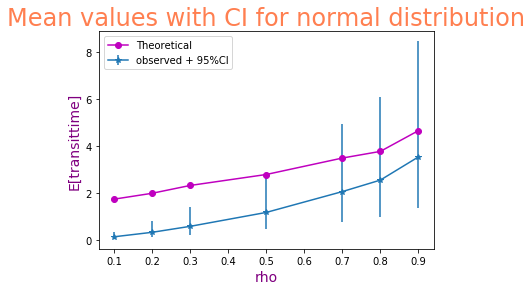

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

observed = np.array([0.148133,0.338590,0.592533 ,1.185066 ,2.071794, 2.561751 ,3.548102])
theoretic = np.array([1.750000 ,2.000000 ,2.333333 ,2.800000 ,3.500000,3.783784 ,4.666667])
ci_lower = np.array([0.090622,0.207136,0.362488,0.724977,1.287442,1.567179,2.170590])
ci_upper = np.array([0.205644,0.470044,0.822577,1.645155,2.876145,3.556323,4.925614])
rho = np.array([0.1,0.2,0.3,0.5,0.7,0.8,0.9])
plt.errorbar(
    rho,
    observed,
    yerr=[ci_lower, ci_upper],marker = '*',label = 'observed + 95%CI'
)
plt.plot(rho,theoretic,color = 'm',marker = 'o',label = "Theoretical")
plt.title('Mean values with CI for normal distribution',fontsize=24,color='coral')
plt.xlabel('rho',fontsize=14,color='purple')
plt.ylabel('E[transittime]',fontsize=14,color='purple')
plt.legend(loc = "upper left")
plt.savefig('Fig-normal.pdf',dpi=100);
plt.show()

In problem 2, I again used 4000 customers leaving the system as the stopping criteria along with the initial set up.
We want 30 samples from which we would again calculate all the statistics similar to problem 1. However, unlike problem 1 where in I used multiple seeds, in this problem, I modified statistic variables as below to generate the 30 samples.

For each sample X, in antithetic variance reduction method, we need two sets of sub samples X1 and X2 generated such that they are negatively correlated inturn reducing covariance between both the samples X1 and X2. These sampleas X1 and X2 are nothing but the average transit times in each run respectively. Average transit times are calculate in the same process as detailed in problem 1.

To achieve this negative correlation, using unfirm distribution and seed 1234567, we first generate a random number between 0 and 1.Lets call this U1. 
We set service time and inter arrival time as follows to generate the result X1:
1) service time = -(1/mu)ln(U1)
2) Inter arrival tme = -(1/lambda)ln(U1)

To generate X2, we set service time and inter arrival time as follows:
1) service time = -(1/mu)ln(1=U1)
2) Inter arrival tme = -(1/lambda)ln(1-U1)

Once we have X1 and X2 from both the run, we generate X_bar1 for 1st samples using(X1+X2)/2. Similarly,we compute X_bars for all the 30 runs.

Calculations:
Using the 30 samples, we again calculate mean, variance,Confidence Interval and Theoretical mean same as described in problem 1.

Below graph shows the rho vs E[transit_time] for both theoretical and computed values using anthithetic variate method. Computed E[T] is same as the mean we calculated above.
I captured the row values by reducing the inter arrival times of customers(Similar to problem 1).

We can see that with an increase in rho, increases E[transit time] and theoretical transit time as well. All the observed means fall within the confidence intervals and almost all observed values as well are within the confidence intervals.

For anithteitc variate method, I observed that confidence intervals increased a lot compared to what I observed in normal distribution.

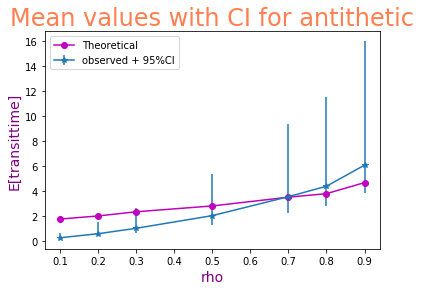

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

observed = np.array([0.253182,0.578703 ,1.012729 ,2.025459  ,3.541012, 4.378424 ,6.064248 ])
theoretic = np.array([1.750000 ,2.000000 ,2.333333 ,2.800000 ,3.500000,3.783784 ,4.666667])
ci_lower = np.array([0.092380,0.211155,0.369520,0.739041,1.292030,1.597581,2.212698])
ci_upper = np.array([0.413985,0.946251,1.655938,3.311877,5.789995,7.159267,9.915799])
rho = np.array([0.1,0.2,0.3,0.5,0.7,0.8,0.9])
plt.errorbar(
    rho,
    observed,
    yerr=[ci_lower, ci_upper],marker = '*',label = 'observed + 95%CI'
)
plt.plot(rho,theoretic,color = 'm',marker = 'o',label = "Theoretical")
plt.title('Mean values with CI for antithetic',fontsize=24,color='coral')
plt.xlabel('rho',fontsize=14,color='purple')
plt.ylabel('E[transittime]',fontsize=14,color='purple')
plt.legend(loc = "upper left")
plt.savefig('Fig-antithetic.pdf',dpi=100);
plt.show()

(0.042822, 0.097879, 0.171288, 0.342576, 0.598909, 0.740545, 1.025677)


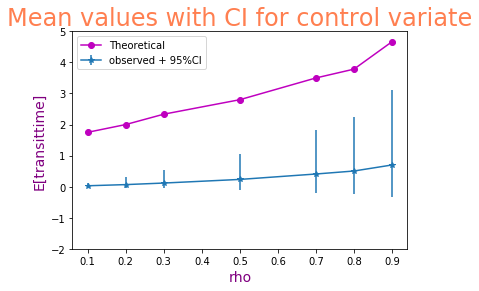

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

observed = np.array([0.029167,0.066667 ,0.116667 ,0.233333  , 0.407925, 0.504395 ,0.698603 ])
theoretic = np.array([1.750000 ,2.000000 ,2.333333 ,2.800000 ,3.500000,3.783784 ,4.666667])
ci_lower = (0.042822,0.097879,0.171288,0.342576,0.598909,0.740545,1.025677)
print ci_lower
ci_upper = (0.101155,0.231212,0.404621,0.809243,1.414760,1.749336,2.422882)
rho = np.array([0.1,0.2,0.3,0.5,0.7,0.8,0.9])
plt.errorbar(
    rho,
    observed,
    yerr=[ci_lower, ci_upper],marker = '*',label = 'observed + 95%CI'
)
plt.ylim([-2,5])
plt.plot(rho,theoretic,color = 'm',marker = 'o',label = "Theoretical")
plt.title('Mean values with CI for control variate',fontsize=24,color='coral')
plt.xlabel('rho',fontsize=14,color='purple')
plt.ylabel('E[transittime]',fontsize=14,color='purple')
plt.legend(loc = "upper left")
plt.savefig('Fig-control.png',dpi=100);
plt.show()